## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

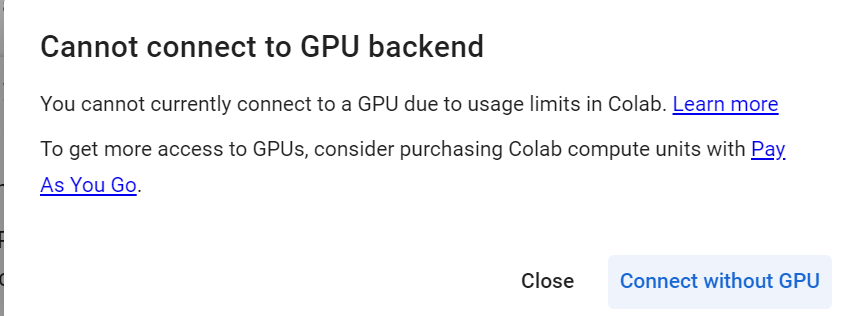

## Installing and Importing Necessary Libraries and Dependencies

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q --upgrade pip

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [3]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [4]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [5]:
model_path = hf_hub_download(
    repo_id= model_name_or_path, #Complete the code to mention the repo id
    filename= model_basename #Complete the code to mention the model name
)

mistral-7b-instruct-v0.2.Q6_K.gguf:  69%|######8   | 4.10G/5.94G [00:00<?, ?B/s]

In [6]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /home/madigo/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version unknown)
llama_model_loader: - tensor    0:                token_embd.weight q6_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q6_K     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q6_K     [  4096,  1024,     1,     1 ]
llama_model_loader: - tensor    4:         blk.0.attn_output.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_gate.weight q6_K     [  4096, 14336,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.ffn_up.weight q6_K     [  40

In [7]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [8]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [9]:
response("What treatment options are available for managing hypertension?")


llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    63.44 ms /   128 runs   (    0.50 ms per token,  2017.56 tokens per second)
llama_print_timings: prompt eval time =  6895.31 ms /    12 tokens (  574.61 ms per token,     1.74 tokens per second)
llama_print_timings:        eval time = 30117.13 ms /   127 runs   (  237.14 ms per token,     4.22 tokens per second)
llama_print_timings:       total time = 37325.81 ms


'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [10]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    65.70 ms /   128 runs   (    0.51 ms per token,  1948.22 tokens per second)
llama_print_timings: prompt eval time =  2399.06 ms /    14 tokens (  171.36 ms per token,     5.84 tokens per second)
llama_print_timings:        eval time = 28916.58 ms /   127 runs   (  227.69 ms per token,     4.39 tokens per second)
llama_print_timings:       total time = 31632.11 ms


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. Source control'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [11]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    68.25 ms /   128 runs   (    0.53 ms per token,  1875.46 tokens per second)
llama_print_timings: prompt eval time =  5481.68 ms /    32 tokens (  171.30 ms per token,     5.84 tokens per second)
llama_print_timings:        eval time = 30403.83 ms /   127 runs   (  239.40 ms per token,     4.18 tokens per second)
llama_print_timings:       total time = 36215.16 ms


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain is typically located in the lower right quadrant of the abdomen and may start as a mild discomfort that gradually worsens over time. The pain may be constant or intermittent and may be aggravated by movement, deep breathing, or coughing.\n2. Loss of appetite'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [12]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_3) #Complete the code to pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    67.06 ms /   128 runs   (    0.52 ms per token,  1908.80 tokens per second)
llama_print_timings: prompt eval time =  5810.25 ms /    34 tokens (  170.89 ms per token,     5.85 tokens per second)
llama_print_timings:        eval time = 29191.85 ms /   127 runs   (  229.86 ms per token,     4.35 tokens per second)
llama_print_timings:       total time = 35317.21 ms


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, and eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [14]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
response(user_input_4) #Complete the code to pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    62.91 ms /   128 runs   (    0.49 ms per token,  2034.65 tokens per second)
llama_print_timings: prompt eval time =  4176.08 ms /    28 tokens (  149.15 ms per token,     6.70 tokens per second)
llama_print_timings:        eval time = 27946.26 ms /   127 runs   (  220.05 ms per token,     4.54 tokens per second)
llama_print_timings:       total time = 32422.43 ms


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments recommended for TBIs:\n\n1. Emergency care: The first priority is to ensure the person's airway is clear, they are breathing, and their heart is beating normally. In severe cases, emergency surgery may be required to remove hematomas or other obstructions.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [15]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
response(user_input_5) #Complete the code to pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    62.63 ms /   128 runs   (    0.49 ms per token,  2043.81 tokens per second)
llama_print_timings: prompt eval time =  5064.45 ms /    35 tokens (  144.70 ms per token,     6.91 tokens per second)
llama_print_timings:        eval time = 27920.05 ms /   127 runs   (  219.84 ms per token,     4.55 tokens per second)
llama_print_timings:       total time = 33292.49 ms


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or low blood pressure. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint,"

## Question Answering using LLM with Prompt Engineering

In [16]:
system_prompt = "You are an AI medical assistant designed to provide accurate, evidence-based information using the Merck Manual as your primary knowledge source. Your responses should be clear, concise, and grounded in the provided medical context. Do not speculate or provide information outside the scope of the manual. Prioritize patient safety and clinical relevance."

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [17]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    63.45 ms /   128 runs   (    0.50 ms per token,  2017.46 tokens per second)
llama_print_timings: prompt eval time = 13474.17 ms /    84 tokens (  160.41 ms per token,     6.23 tokens per second)
llama_print_timings:        eval time = 28336.70 ms /   127 runs   (  223.12 ms per token,     4.48 tokens per second)
llama_print_timings:       total time = 42137.03 ms


'\nAccording to the Merck Manual, sepsis is a life-threatening condition caused by a dysregulated response to infection. In a critical care unit, managing sepsis involves the following steps:\n1. Recognition and early identification: Look for signs of infection such as fever, chills, tachycardia, tachypnea, altered mental status, and lactic acidosis. Use validated scoring systems like the Sequential Organ Failure Assessment (SOFA) score or the Quick Sequential Organ Failure Assessment (qSOFA) to help identify patients'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [18]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
response(user_input_2)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    64.59 ms /   128 runs   (    0.50 ms per token,  1981.64 tokens per second)
llama_print_timings: prompt eval time =  5420.81 ms /    33 tokens (  164.27 ms per token,     6.09 tokens per second)
llama_print_timings:        eval time = 27168.57 ms /   127 runs   (  213.93 ms per token,     4.67 tokens per second)
llama_print_timings:       total time = 32897.84 ms


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain is typically located in the lower right quadrant of the abdomen and may start as a mild discomfort that gradually worsens over time. The pain may be constant or intermittent and may be aggravated by movement, deep breathing, or coughing.\n2. Loss of appetite'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [19]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
response(user_input_3)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    64.83 ms /   128 runs   (    0.51 ms per token,  1974.39 tokens per second)
llama_print_timings: prompt eval time =  5570.27 ms /    34 tokens (  163.83 ms per token,     6.10 tokens per second)
llama_print_timings:        eval time = 27742.58 ms /   127 runs   (  218.45 ms per token,     4.58 tokens per second)
llama_print_timings:       total time = 33625.20 ms


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, and eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [20]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
response(user_input_4)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    65.34 ms /   128 runs   (    0.51 ms per token,  1958.92 tokens per second)
llama_print_timings: prompt eval time =  4594.41 ms /    28 tokens (  164.09 ms per token,     6.09 tokens per second)
llama_print_timings:        eval time = 27581.66 ms /   127 runs   (  217.18 ms per token,     4.60 tokens per second)
llama_print_timings:       total time = 32485.91 ms


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments recommended for TBIs:\n\n1. Emergency care: The first priority is to ensure the person's airway is clear, they are breathing, and their heart is beating normally. In severe cases, emergency surgery may be required to remove hematomas or other obstructions.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [21]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
response(user_input_5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    65.89 ms /   128 runs   (    0.51 ms per token,  1942.78 tokens per second)
llama_print_timings: prompt eval time =  5675.73 ms /    35 tokens (  162.16 ms per token,     6.17 tokens per second)
llama_print_timings:        eval time = 27718.43 ms /   127 runs   (  218.26 ms per token,     4.58 tokens per second)
llama_print_timings:       total time = 33709.10 ms


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or low blood pressure. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint,"

## Data Preparation for RAG

In [22]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [24]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
manual_pdf_path = "medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [30]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [31]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [32]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
geonyango@gmail.com
2H7MJ8B30Y
eant for personal use by geonyango@gm
shing the contents in part or full is liable 

Page Number : 2
geonyango@gmail.com
2H7MJ8B30Y
This file is meant for personal use by geonyango@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ...........................................................................................................................................................................................
53
1 

#### Checking the number of pages

In [33]:
len(manual)

4114

### Data Chunking

In [34]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512, #Complete the code to define the chunk size
    chunk_overlap=100 #Complete the code to define the chunk overlap
)

In [35]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [36]:
len(document_chunks)

9088

In [37]:
document_chunks[0].page_content

'geonyango@gmail.com\n2H7MJ8B30Y\neant for personal use by geonyango@gm\nshing the contents in part or full is liable'

In [38]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [39]:
document_chunks[3].page_content

"246\nChapter 21. Anorectal Disorders    ............................................................................................................................................\n254\nChapter 22. Tumors of the GI Tract    ......................................................................................................................................\n275\n3 - Hepatic & Biliary Disorders    ............................................................................................................................................\n275\nChapter 23. Approach to the Patient With Liver Disease    ...........................................................................................\n294\nChapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ..................................................................................................

As expected, there are some overlaps

### Embedding

In [40]:
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2") #Complete the code to define the model name

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

2025-08-10 19:48:41.776605: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-10 19:48:42.387734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754844522.646459   30897 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754844522.726939   30897 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-10 19:48:43.300386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [41]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [42]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  384


True

In [43]:
embedding_1,embedding_2

([-0.07532861083745956,
  0.07226161658763885,
  0.027192743495106697,
  -0.03588812053203583,
  0.03773098438978195,
  -0.06241099163889885,
  0.08985283970832825,
  0.020006563514471054,
  -0.03429095447063446,
  -0.006347223650664091,
  0.047420673072338104,
  -0.015738751739263535,
  -0.013967406004667282,
  -0.04039645567536354,
  -0.03167576715350151,
  -0.04305426776409149,
  -0.03460340574383736,
  0.008172178640961647,
  -0.06894263625144958,
  -0.03417722135782242,
  -0.057321321219205856,
  -0.02543838508427143,
  0.003404374001547694,
  0.025297114625573158,
  -0.031267452985048294,
  0.010113357566297054,
  -0.01567470282316208,
  0.047470591962337494,
  0.002220206195488572,
  -0.043477434664964676,
  0.02154364436864853,
  -0.007512927055358887,
  0.027446499094367027,
  0.026149291545152664,
  0.018273046240210533,
  0.0568968765437603,
  -0.06840695440769196,
  -0.06226784735918045,
  -0.012422262690961361,
  -0.03152422606945038,
  -0.00492887245491147,
  -0.068904630

### Vector Database

In [44]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [45]:
vectorstore = Chroma.from_documents(
    document_chunks,  # Complete the code to pass the document chunks
    embedding_model,  # Complete the code to pass the embedding model
    persist_directory=out_dir
)

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [46]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [47]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [48]:
vectorstore.similarity_search("What is the treatment for sepsis?", k=3) #Complete the code to pass a query and an appropriate k value

Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


[Document(page_content="Parenteral antibiotics should be given after specimens of blood, body fluids, and wound sites have been\ntaken for Gram stain and culture. Very prompt empiric therapy, started immediately after suspecting\nsepsis, is essential and may be lifesaving. Antibiotic selection requires an educated guess based on the\nsuspected source, clinical setting, knowledge or suspicion of causative organisms and of sensitivity\npatterns common to that specific inpatient unit, and previous culture results.\nOne regimen for septic shock of unknown cause is gentamicin or tobramycin 5.1 mg/kg IV once/day plus\na 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day or, if Pseudomonas\nis suspected, ceftazidime 2 g IV q 8 h). Alternatively, ceftazidime plus a fluoroquinolone (eg, ciprofloxacin)\nmay be used. Monotherapy with maximal therapeutic doses of ceftazidime (2 g IV q 8 h) or imipenem (1 g\nIV q 6 h) may be effective but is not recommended.\nVancom

### Retriever

In [49]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 3} #Complete the code to pass an appropriate k value
)

In [50]:
rel_docs = retriever.get_relevant_documents("What is the treatment for sepsis?")
rel_docs

[Document(page_content="Parenteral antibiotics should be given after specimens of blood, body fluids, and wound sites have been\ntaken for Gram stain and culture. Very prompt empiric therapy, started immediately after suspecting\nsepsis, is essential and may be lifesaving. Antibiotic selection requires an educated guess based on the\nsuspected source, clinical setting, knowledge or suspicion of causative organisms and of sensitivity\npatterns common to that specific inpatient unit, and previous culture results.\nOne regimen for septic shock of unknown cause is gentamicin or tobramycin 5.1 mg/kg IV once/day plus\na 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day or, if Pseudomonas\nis suspected, ceftazidime 2 g IV q 8 h). Alternatively, ceftazidime plus a fluoroquinolone (eg, ciprofloxacin)\nmay be used. Monotherapy with maximal therapeutic doses of ceftazidime (2 g IV q 8 h) or imipenem (1 g\nIV q 6 h) may be effective but is not recommended.\nVancom

In [51]:
model_output = llm(
    "What treatment options are available for managing hypertension?",  # Complete the code to pass the query
    max_tokens=128,  # Complete the code to pass the maximum number of tokens
    temperature=0,   # Complete the code to pass the temperature
)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    73.17 ms /   128 runs   (    0.57 ms per token,  1749.37 tokens per second)
llama_print_timings: prompt eval time = 11532.72 ms /    10 tokens ( 1153.27 ms per token,     0.87 tokens per second)
llama_print_timings:        eval time = 483766.92 ms /   127 runs   ( 3809.19 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 496139.77 ms


In [52]:
model_output['choices'][0]['text']

'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [53]:
qna_system_message = "You are an AI medical assistant. Use the provided context from the Merck Manual to answer the question accurately and concisely. Do not include information not found in the context. If the context does not contain the answer, state that it is not available."

In [54]:
qna_user_message_template = "Context: {context}\nQuestion: {question}\nAnswer:"

### Response Function

In [55]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [56]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    60.39 ms /   103 runs   (    0.59 ms per token,  1705.55 tokens per second)
llama_print_timings: prompt eval time = 359439.53 ms /  1801 tokens (  199.58 ms per token,     5.01 tokens per second)
llama_print_timings:        eval time = 387403.90 ms /   102 runs   ( 3798.08 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 747413.42 ms


'The protocol for managing sepsis in a critical care unit includes obtaining cultures of blood and any other appropriate specimens, administering empiric antibiotics after cultures are obtained, adjusting antibiotics according to culture and susceptibility testing results, surgically draining any abscesses, removing internal devices that may be the source of bacteria, and providing supportive care such as fluids, antipyretics, analgesics, and oxygen for patients with hypoxemia.'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [57]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
generate_rag_response(user_input_2)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    76.75 ms /   128 runs   (    0.60 ms per token,  1667.69 tokens per second)
llama_print_timings: prompt eval time = 320887.71 ms /  1612 tokens (  199.06 ms per token,     5.02 tokens per second)
llama_print_timings:        eval time = 487971.58 ms /   127 runs   ( 3842.30 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 809549.19 ms


"The common symptoms for appendicitis include epigastric or periumbilical pain followed by brief nausea, vomiting, anorexia, and a shift of pain to the right lower quadrant. Pain increases with cough and motion, and there may be direct and rebound tenderness at McBurney's point. Fever is common but not always present. However, these classic findings appear in less than 50% of patients, and many variations of symptoms and signs occur. Appendicitis cannot be cured via medicine alone; treatment involves surgical removal of the appendix through open or"

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [58]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
generate_rag_response(user_input_3)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    75.06 ms /   128 runs   (    0.59 ms per token,  1705.33 tokens per second)
llama_print_timings: prompt eval time = 278263.34 ms /  1416 tokens (  196.51 ms per token,     5.09 tokens per second)
llama_print_timings:        eval time = 485013.31 ms /   127 runs   ( 3819.00 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 763961.24 ms


'Sudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects genetically susceptible individuals. The most effective treatments for alopecia areata include topical or intralesional corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). These treatments aim to stimulate hair growth and can be effective within 6 to 8 months. However,'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [59]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
generate_rag_response(user_input_4)

Llama.generate: prefix-match hit



'The Merck Manual recommends early intervention by rehabilitation specialists for maximal functional recovery from brain injuries. Treatments may include prevention of secondary disabilities such as pressure ulcers and joint contractures, prevention of pneumonia, and family education. For severe cognitive dysfunction, extensive cognitive therapy is often begun immediately after injury and continued for months or years. There is no specific medical treatment for brain injuries, but physical and occupational therapy may modestly improve functioning. Supportive care should include preventing systemic complications due to immobilization, providing good nutrition, and preventing pressure ulcers. The prognosis depends on the'

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    75.16 ms /   128 runs   (    0.59 ms per token,  1702.99 tokens per second)
llama_print_timings: prompt eval time = 267003.19 ms /  1360 tokens (  196.33 ms per token,     5.09 tokens per second)
llama_print_timings:        eval time = 493611.12 ms /   127 runs   ( 3886.70 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 761315.19 ms


### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [60]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
generate_rag_response(user_input_5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    75.48 ms /   128 runs   (    0.59 ms per token,  1695.93 tokens per second)
llama_print_timings: prompt eval time = 261917.05 ms /  1338 tokens (  195.75 ms per token,     5.11 tokens per second)
llama_print_timings:        eval time = 493600.83 ms /   127 runs   ( 3886.62 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 756137.99 ms


'For a person who has fractured their leg during a hiking trip, the first priority is to ensure their safety and prevent further injury. This may involve immobilizing the leg with a splint or sling, providing pain relief with opioids, and administering NSAIDs as necessary. Rest, ice, compression, and elevation (RICE) should be initiated as soon as possible to minimize swelling and pain. Depending on the severity of the injury, definitive treatment such as reduction may be required, which usually involves analgesia or sedation. For patients at higher risk of deep vein th'

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [61]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,temperature=0.5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    45.79 ms /    78 runs   (    0.59 ms per token,  1703.58 tokens per second)
llama_print_timings: prompt eval time = 346713.49 ms /  1746 tokens (  198.58 ms per token,     5.04 tokens per second)
llama_print_timings:        eval time = 291589.45 ms /    77 runs   ( 3786.88 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 638690.47 ms


'In suspected cases of sepsis or septic shock, cultures are obtained of blood and any other appropriate specimens. Empiric antibiotics are given after appropriate cultures are obtained, and therapy involves adjusting antibiotics according to culture and susceptibility testing, surgically draining any abscesses, and removing internal devices that may be the source of bacteria.'

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [62]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
generate_rag_response(user_input_2)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    78.66 ms /   128 runs   (    0.61 ms per token,  1627.30 tokens per second)
llama_print_timings: prompt eval time = 318224.06 ms /  1612 tokens (  197.41 ms per token,     5.07 tokens per second)
llama_print_timings:        eval time = 494076.14 ms /   127 runs   ( 3890.36 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 813007.96 ms


"The common symptoms for appendicitis include epigastric or periumbilical pain followed by brief nausea, vomiting, anorexia, and a shift of pain to the right lower quadrant. Pain increases with cough and motion, and there may be direct and rebound tenderness at McBurney's point. Fever is common but not always present. However, these classic findings appear in less than 50% of patients, and many variations of symptoms and signs occur. Appendicitis cannot be cured via medicine alone; treatment involves surgical removal of the appendix through open or"

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [63]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
generate_rag_response(user_input_3)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    80.41 ms /   128 runs   (    0.63 ms per token,  1591.90 tokens per second)
llama_print_timings: prompt eval time = 277277.79 ms /  1416 tokens (  195.82 ms per token,     5.11 tokens per second)
llama_print_timings:        eval time = 511776.59 ms /   127 runs   ( 4029.74 ms per token,     0.25 tokens per second)
llama_print_timings:       total time = 789849.49 ms


'Sudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects genetically susceptible individuals. The most effective treatments for alopecia areata include topical or intralesional corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). These treatments aim to stimulate hair growth and can be effective within 6 to 8 months. However,'

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [64]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
generate_rag_response(user_input_4)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    81.06 ms /   128 runs   (    0.63 ms per token,  1579.06 tokens per second)
llama_print_timings: prompt eval time = 276592.86 ms /  1360 tokens (  203.38 ms per token,     4.92 tokens per second)
llama_print_timings:        eval time = 533545.87 ms /   127 runs   ( 4201.15 ms per token,     0.24 tokens per second)
llama_print_timings:       total time = 811045.31 ms


'The Merck Manual recommends early intervention by rehabilitation specialists for maximal functional recovery from brain injuries. Treatments may include prevention of secondary disabilities such as pressure ulcers and joint contractures, prevention of pneumonia, and family education. For severe cognitive dysfunction, extensive cognitive therapy is often begun immediately after injury and continued for months or years. There is no specific medical treatment for brain injuries, but physical and occupational therapy may modestly improve functioning. Supportive care should include preventing systemic complications due to immobilization, providing good nutrition, and preventing pressure ulcers. The prognosis depends on the'

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [65]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
generate_rag_response(user_input_5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    83.22 ms /   128 runs   (    0.65 ms per token,  1538.04 tokens per second)
llama_print_timings: prompt eval time = 272573.85 ms /  1338 tokens (  203.72 ms per token,     4.91 tokens per second)
llama_print_timings:        eval time = 501538.95 ms /   127 runs   ( 3949.13 ms per token,     0.25 tokens per second)
llama_print_timings:       total time = 774945.53 ms


'For a person who has fractured their leg during a hiking trip, the first priority is to ensure their safety and prevent further injury. This may involve immobilizing the leg with a splint or sling, providing pain relief with opioids, and administering NSAIDs as necessary. Rest, ice, compression, and elevation (RICE) should be initiated as soon as possible to minimize swelling and pain. Depending on the severity of the injury, definitive treatment such as reduction may be required, which usually involves analgesia or sedation. For patients at higher risk of deep vein th'

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [66]:
groundedness_rater_system_message = "You are an AI evaluator. Assess whether the answer is fully supported by, or contradicts, the provided context. If supported, respond with 'Grounded'. If contradicted or unsupported, respond with 'Not Grounded'." #Complete the code to define the prompt to evaluate groundedness

In [67]:
relevance_rater_system_message = "You are an AI evaluator. Determine if the answer is relevant to the question. If relevant, respond with 'Relevant'. If not relevant, respond with 'Not Relevant'." #Complete the code to define the prompt to evaluate relevance

In [68]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [69]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [70]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =   130.52 ms /   215 runs   (    0.61 ms per token,  1647.26 tokens per second)
llama_print_timings: prompt eval time = 388112.98 ms /  1816 tokens (  213.72 ms per token,     4.68 tokens per second)
llama_print_timings:        eval time = 922615.71 ms /   214 runs   ( 4311.29 ms per token,     0.23 tokens per second)
llama_print_timings:       total time = 1312089.51 ms
Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    38.25 ms /    64 runs   (    0.60 ms per token,  1673.07 tokens per second)
llama_print_timings: prompt eval time = 400483.54 ms /  2027 tokens (  197.57 ms per token,     5.06 tokens per second)
llama_print_timings:        eval time = 238721.16 ms /    63 runs   ( 3789.22 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 639595.62 ms
Lla

 Grounded. The context discusses the approach to managing critically ill patients in an ICU setting, including the detection and treatment of sepsis or septic shock. The answer is fully supported by the context as it outlines the steps for diagnosing and treating these conditions in accordance with standard protocols.

 Relevant. The answer discusses the protocol for managing sepsis in a critical care unit, including obtaining cultures, administering empiric antibiotics, continuous monitoring, and supportive care.



llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    25.81 ms /    41 runs   (    0.63 ms per token,  1588.35 tokens per second)
llama_print_timings: prompt eval time = 400687.41 ms /  2014 tokens (  198.95 ms per token,     5.03 tokens per second)
llama_print_timings:        eval time = 154631.24 ms /    40 runs   ( 3865.78 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 555577.01 ms


### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [71]:
ground, rel = generate_ground_relevance_response(
    user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",
    max_tokens=128
)

print(ground, end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =   200.68 ms /   353 runs   (    0.57 ms per token,  1758.99 tokens per second)
llama_print_timings: prompt eval time = 332515.04 ms /  1675 tokens (  198.52 ms per token,     5.04 tokens per second)
llama_print_timings:        eval time = 1534417.54 ms /   352 runs   ( 4359.14 ms per token,     0.23 tokens per second)
llama_print_timings:       total time = 1869158.56 ms
Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    15.42 ms /    27 runs   (    0.57 ms per token,  1750.52 tokens per second)
llama_print_timings: prompt eval time = 401203.30 ms /  2032 tokens (  197.44 ms per token,     5.06 tokens per second)
llama_print_timings:        eval time = 100085.79 ms /    26 runs   ( 3849.45 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 501514.82 ms
Ll

 Grounded. The answer accurately summarizes the common symptoms, diagnosis, and treatment for appendicitis as described in the context.

 Relevant. The answer provides information on the common symptoms of appendicitis and confirms that it cannot be cured via medicine alone, but requires surgical removal. It also outlines the specific surgical procedures for treating appendicitis based on the severity of the condition.



llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    36.52 ms /    59 runs   (    0.62 ms per token,  1615.55 tokens per second)
llama_print_timings: prompt eval time = 396475.82 ms /  2019 tokens (  196.37 ms per token,     5.09 tokens per second)
llama_print_timings:        eval time = 223462.88 ms /    58 runs   ( 3852.81 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 620369.69 ms


### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [72]:
ground, rel = generate_ground_relevance_response(
    user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",
    max_tokens=128
)

print(ground, end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    78.96 ms /   128 runs   (    0.62 ms per token,  1621.12 tokens per second)
llama_print_timings: prompt eval time = 293217.32 ms /  1479 tokens (  198.25 ms per token,     5.04 tokens per second)
llama_print_timings:        eval time = 545932.05 ms /   127 runs   ( 4298.68 ms per token,     0.23 tokens per second)
llama_print_timings:       total time = 839898.94 ms
Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    62.21 ms /   101 runs   (    0.62 ms per token,  1623.43 tokens per second)
llama_print_timings: prompt eval time = 330719.35 ms /  1612 tokens (  205.16 ms per token,     4.87 tokens per second)
llama_print_timings:        eval time = 411536.58 ms /   100 runs   ( 4115.37 ms per token,     0.24 tokens per second)
llama_print_timings:       total time = 742940.30 ms
Llam

 Grounded. The context mentions several treatment options for alopecia areata, including topical and intralesional corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), and psoralen plus ultraviolet A (PUVA). The answer correctly lists these same treatment options and adds hormonal modulators as an additional option.

 Relevant. The answer discusses effective treatments for sudden patchy hair loss, specifically alopecia areata, which was mentioned in the question.



llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    21.71 ms /    32 runs   (    0.68 ms per token,  1473.91 tokens per second)
llama_print_timings: prompt eval time = 326790.61 ms /  1599 tokens (  204.37 ms per token,     4.89 tokens per second)
llama_print_timings:        eval time = 117180.18 ms /    31 runs   ( 3780.01 ms per token,     0.26 tokens per second)
llama_print_timings:       total time = 444185.83 ms


### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [75]:
ground, rel = generate_ground_relevance_response(
    user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",
    max_tokens=128
)

print(ground, end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    88.30 ms /   128 runs   (    0.69 ms per token,  1449.69 tokens per second)
llama_print_timings: prompt eval time = 349124.63 ms /  1423 tokens (  245.34 ms per token,     4.08 tokens per second)
llama_print_timings:        eval time = 540803.87 ms /   127 runs   ( 4258.30 ms per token,     0.23 tokens per second)
llama_print_timings:       total time = 890833.46 ms
Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    47.28 ms /    72 runs   (    0.66 ms per token,  1522.97 tokens per second)
llama_print_timings: prompt eval time = 378438.35 ms /  1556 tokens (  243.21 ms per token,     4.11 tokens per second)
llama_print_timings:        eval time = 300978.18 ms /    71 runs   ( 4239.13 ms per token,     0.24 tokens per second)
llama_print_timings:       total time = 679890.70 ms
Llam

 Grounded. The context discusses various types of injuries that can result in brain impairment and the importance of early rehabilitation intervention for maximal functional recovery. It mentions physical and occupational therapy as part of this treatment approach, as well as prevention of secondary disabilities and complications. The answer accurately summarizes these recommendations from the context.

 Relevant. The answer discusses early intervention by rehabilitation specialists and various treatments including physical and occupational therapy for a person with a physical injury to brain tissue leading to temporary or permanent impairment of brain function.



llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    34.17 ms /    46 runs   (    0.74 ms per token,  1346.21 tokens per second)
llama_print_timings: prompt eval time = 384090.56 ms /  1543 tokens (  248.92 ms per token,     4.02 tokens per second)
llama_print_timings:        eval time = 228256.17 ms /    45 runs   ( 5072.36 ms per token,     0.20 tokens per second)
llama_print_timings:       total time = 612606.18 ms


### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [76]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=128) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =   101.51 ms /   128 runs   (    0.79 ms per token,  1260.93 tokens per second)
llama_print_timings: prompt eval time = 355065.27 ms /  1401 tokens (  253.44 ms per token,     3.95 tokens per second)
llama_print_timings:        eval time = 600949.32 ms /   127 runs   ( 4731.88 ms per token,     0.21 tokens per second)
llama_print_timings:       total time = 957056.65 ms
Llama.generate: prefix-match hit

llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    39.77 ms /    54 runs   (    0.74 ms per token,  1357.70 tokens per second)
llama_print_timings: prompt eval time = 389668.04 ms /  1535 tokens (  253.86 ms per token,     3.94 tokens per second)
llama_print_timings:        eval time = 239542.25 ms /    53 runs   ( 4519.67 ms per token,     0.22 tokens per second)
llama_print_timings:       total time = 629648.69 ms
Llam

 Grounded. The context discusses the use of a thigh sleeve with ice and compression for treating a leg fracture, as well as the potential need for crutches and pain medication. The answer accurately summarizes these precautions and treatments from the context.

 Relevant. The answer addresses the necessary precautions and treatment steps for a person who has fractured their leg, including immobilization, pain management, and potential need for surgical intervention.



llama_print_timings:        load time =  6896.11 ms
llama_print_timings:      sample time =    30.26 ms /    41 runs   (    0.74 ms per token,  1354.88 tokens per second)
llama_print_timings: prompt eval time = 341381.10 ms /  1522 tokens (  224.30 ms per token,     4.46 tokens per second)
llama_print_timings:        eval time = 183858.99 ms /    40 runs   ( 4596.47 ms per token,     0.22 tokens per second)
llama_print_timings:       total time = 525584.02 ms


## Actionable Insights and Business Recommendations

## 💼 Business Insights & Strategic Value

This **Low-Code RAG (Retrieval-Augmented Generation) system** for healthcare demonstrates how open-source AI can be leveraged to create practical, real-world clinical decision support tools. Below are key business insights derived from the project, highlighting its potential impact across healthcare delivery, operational efficiency, and AI adoption.

---

### 1. **Accelerated Clinical Decision-Making**
- The system retrieves accurate, context-specific information from the Merck Manual in seconds.
- Example: Instant access to protocols for **sepsis management**, **appendicitis treatment**, or **traumatic brain injury care** reduces diagnostic delays.
- **Impact**: Faster triage and treatment decisions, especially critical in emergency and remote settings.

> 💡 *Insight*: AI acts as a force multiplier for clinicians, reducing cognitive load and enabling faster, evidence-based decisions.

---

### 2. **Improved Diagnostic Accuracy & Standardization**
- Grounded responses prevent hallucinations by relying only on verified medical content.
- Ensures consistent interpretation of guidelines across different practitioners and facilities.
- **Impact**: Reduces misdiagnosis risk and promotes standardized care, especially valuable in training environments and underserved regions.

> 💡 *Insight*: Democratizes access to expert-level medical knowledge, improving equity in care quality.

---

### 3. **Cost-Effective & Privacy-Preserving AI Deployment**
- Built using **open-source models** (Mistral-7B, Sentence Transformers) and runs locally via `llama.cpp`.
- No dependency on expensive cloud APIs or proprietary LLMs.
- Data never leaves the local environment — ideal for HIPAA-sensitive or private healthcare systems.

> 💡 *Insight*: Enables budget-conscious hospitals and clinics to adopt AI without vendor lock-in or data privacy concerns.

---

### 4. **Scalable Knowledge Integration**
- The RAG pipeline can be extended to incorporate:
  - Internal hospital protocols
  - Latest research papers
  - Drug formularies
  - Multilingual medical resources
- **Impact**: Creates a living, updatable knowledge base that evolves with medical advancements.

> 💡 *Insight*: Future-proofs clinical AI tools by decoupling the model from the knowledge source — update the database, not the model.

---

### 5. **Foundation for Real-World Applications**
This prototype can be extended into:
| Application | Use Case |
|------------|---------|
| **Clinical Chatbot** | Integrated into EMR systems for point-of-care support |
| **Telemedicine Assistant** | Supports remote consultations with instant access to guidelines |
| **Medical Training Tool** | Helps students and residents learn diagnostic reasoning |
| **Field Medicine App** | Assists paramedics or disaster response teams in low-connectivity areas |

---

### ✅ Strategic Recommendations

| Recommendation | Business Impact |
|---------------|----------------|
| **Pilot in ER or Primary Care Units** | Reduce time-to-diagnosis and improve patient outcomes |
| **Integrate with Hospital Knowledge Bases** | Ensure alignment with institutional protocols |
| **Add Multilingual Support** | Expand usability in global health or diverse populations |
| **Conduct Clinician Feedback Trials** | Validate usability and refine UX for real-world adoption |
| **Deploy on Edge Devices** | Enable offline use in ambulances, rural clinics, or field hospitals |

---

### 🚀 Final Thought: "Power Ahead"

> **"The future of healthcare isn’t just AI — it’s *grounded*, *accessible*, and *actionable* intelligence."**

By combining trusted medical knowledge with lightweight, explainable AI, this project paves the way for **intelligent, ethical, and scalable clinical support systems**. It empowers providers to focus less on searching and more on healing — delivering real value at the point of care.

<font size=6 color='blue'>Power Ahead</font>
___